# Catalog exploration example

In [1]:
import intake
from fresca_catalog import (
    search_catalog_variables,
    filter_catalog,
    plot_map,
    plot_grid, 
    plot_timeseries
)

In [2]:
catalog = intake.open_catalog('full_catalog.yml')
catalog

Catalog
 named datasets: ['all_ctd', 'sfer']
  parameters: ['CATALOG_DIR', 'CATALOG_PATH', 'STORAGE_OPTIONS']

In [ ]:
filtered_catalog = filter_catalog(
    catalog,
    variables=['sal', 'salinity', 'o2_ctd', 'dissolved_oxygen'],
    time_range=('2000-01-01T00:00:00Z', '2010-12-31T00:00:00Z')
)
filtered_catalog

Catalog
 named datasets: ['all_ctd']

In [ ]:
filtered_catalog.metadata

{'time_range': ('2000-01-01T00:00:00Z', '2010-12-31T00:00:00Z'),
 'variables': ['dissolved_oxygen', 'o2_ctd', 'salinity', 'sal']}

In [ ]:
plot_map(filtered_catalog, time_bin='ME', log=True)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (completeness,station)

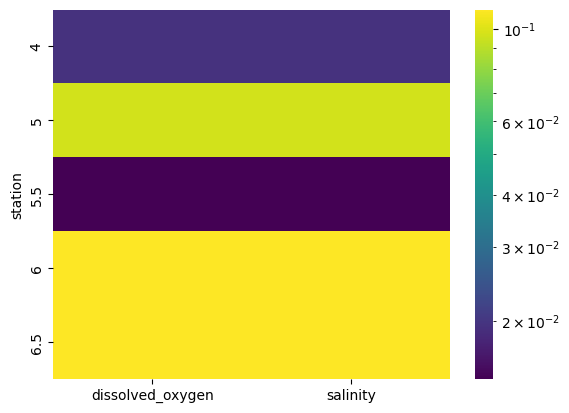

In [ ]:
plot_grid(filtered_catalog, stations=['4', '5', '5.5', '6', '6.5'], time_bin='ME', log=True)

/home/trevor/dev/fresca-catalog/fresca_catalog.py:561: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  agg_table = agg_table.groupby('station').resample(time_bin).sum(numeric_only=True).fillna(0).reset_index()


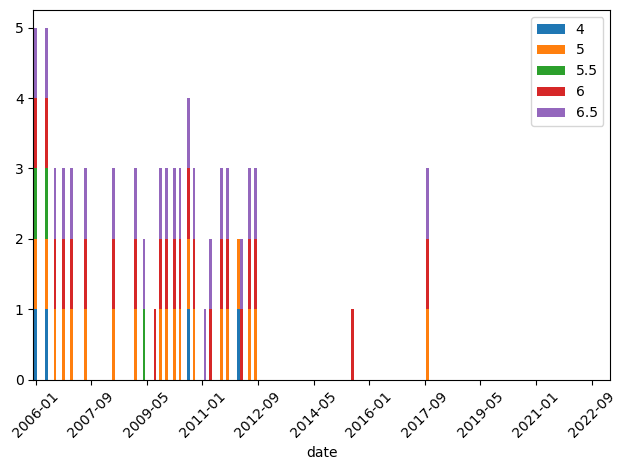

In [ ]:
plot_timeseries(filtered_catalog, stations=['4', '5', '5.5', '6', '6.5'], time_bin='ME')

In [10]:
help(search_catalog_variables)

Help on function search_catalog_variables in module fresca_catalog:

search_catalog_variables(catalog, query=None, case_insensitive=True, fuzzy=False) -> List[str]
    Searches the catalog for variables.
    
    Parameters
    ----------
    catalog : Catalog
        The catalog to search.
    query : str, optional
        The query to search for. If not provided, all variables are returned.
    case_insensitive : bool, optional
        Whether to perform a case-insensitive search. Default is True.
    fuzzy : bool, optional
        Whether to perform a fuzzy search. Default is False.
    
    Returns
    -------
    list
        A list of matching variables.



In [11]:
search_catalog_variables(catalog, 'sal')

['sal', 'salinity']

In [12]:
search_catalog_variables(catalog, 'temp')

['temp', 'temperature']

In [13]:
help(filter_catalog)

Help on function filter_catalog in module fresca_catalog:

filter_catalog(catalog: intake.readers.entry.Catalog, entry_names: List[str] = None, variables: List[str] = None, time_range: Tuple[str, str] = None, bbox: Tuple[float, float, float, float] = None) -> intake.readers.entry.Catalog
    Filters a catalog based on the provided criteria.
    
    Parameters
    ----------
    catalog : Catalog
        The catalog to filter.
    entries : list, optional
        The entries to be used for filtering.
    variables : list, optional
        The variables to be used for filtering.
    time_range : list, optional
        The time range to be used for filtering, formatted as [min_time, max_time].
    bbox : list, optional
        The bounding box to be used for filtering, formatted as [min_lon, min_lat, max_lon, max_lat].
    
    Returns
    -------
    Catalog
        The filtered catalog.



In [4]:
my_catalog = filter_catalog(catalog, variables=['temp', 'temperature'])
my_catalog

Catalog
 named datasets: ['all_ctd', 'sfer']

In [8]:
map_datasets(my_catalog, time_bin='Y', log=True)

/home/trevor/dev/fresca-catalog/fresca_catalog.py:423: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  agg_table = agg_table.groupby(['station', 'geometry']).resample(time_bin).sum(numeric_only=True).fillna(0).reset_index()


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (completeness,station)

In [18]:
map_datasets(my_catalog, variables=['temp', 'temperature'], log=True)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (completeness)

In [19]:
map_datasets(my_catalog, variables=['temp', 'temperature'], log=True, hex=True)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (completeness)

In [20]:
my_catalog = filter_catalog(
    catalog,
    variables=['temp', 'temperature'],
    time_range=('2023-12-01T13:23:00Z', '2024-11-17T23:54:00Z'),
    bbox=(-70.0, 20.0, -90.0, 40.0)
)
my_catalog

Catalog
 named datasets: ['sfer']

In [21]:
my_catalog['sfer'].metadata

{'lat_col': 'lat_dec',
 'lon_col': 'lon_dec',
 'maxLatitude': 28.7841,
 'maxLongitude': -80.0442,
 'maxTime': '2024-11-17T00:00:00Z',
 'minLatitude': 24.3952,
 'minLongitude': -85.0221,
 'minTime': '2014-12-01T00:00:00Z',
 'time_col': 'date',
 'variables': ['date',
  'cruise_id',
  'station',
  'event_n',
  'temp',
  'sal',
  'o2_ctd',
  'nh4',
  'no2',
  'no3',
  'no3_no2',
  'po4',
  'si',
  'avg_chl_a',
  'avg_phaeo',
  'lat_dec',
  'lon_dec',
  'station_type']}

In [22]:
df = my_catalog['sfer'].read()
df.head()

,date,cruise_id,station,event_n,temp,sal,o2_ctd,nh4,no2,no3,no3_no2,po4,si,avg_chl_a,avg_phaeo,lat_dec,lon_dec,station_type
0,2014-12-01,WS14335,1,1,1,1,0,1,1,1,1,1,1,1,1,25.6450,-80.1252,F
1,2014-12-01,WS14335,2,1,1,1,0,1,1,1,1,1,1,1,1,25.6415,-80.1042,F
2,2014-12-01,WS14335,3,1,1,1,0,1,1,1,1,1,1,1,1,25.6458,-80.0818,F
3,2014-12-01,WS14335,4,1,1,1,0,1,1,1,1,1,1,1,1,25.1087,-80.3826,F
4,2014-12-01,WS14335,5,1,1,1,0,1,1,1,1,1,1,1,1,25.0906,-80.3591,F


In [23]:
df.to_csv('my_data.csv', index=False)

In [24]:
my_catalog.to_yaml_file('my_catalog.yaml')